[Code source](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.7-predicting-house-prices.ipynb)

In [53]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.datasets.boston_housing as house_data
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
from time import time

In [54]:
# variables
batch_size = 32
epochs = 300

In [55]:
# load data
(train_data, train_labels), (test_data, test_labels) = house_data.load_data()

In [56]:
# check the shapes and data
print(train_data.shape)
print(train_labels.shape)
print(train_data[0])
print(train_data[1])

(404, 13)
(404,)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]


<function matplotlib.pyplot.show(*args, **kw)>

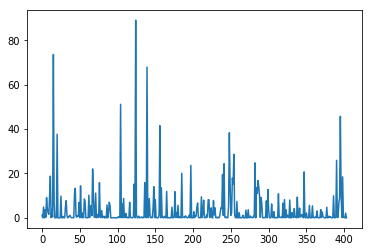

In [57]:
plt.plot(train_data[:,0])
plt.show

In [58]:
# standardaize the featues
# remove mean
mean = train_data.mean(axis=0)
train_data -= mean
# divide with std dev
std = train_data.std(axis=0)
train_data /= std
print('mean:\n{}\n std:\n{}'.format(mean, std))

mean:
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
 std:
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]


In [59]:
# standardize test data with train mean, std
test_data -= mean
test_data /= std

<function matplotlib.pyplot.show(*args, **kw)>

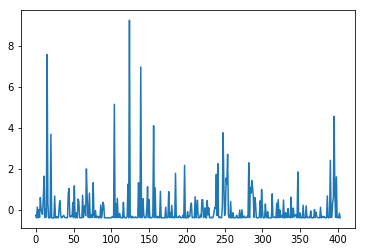

In [60]:
plt.plot(train_data[:,0])
plt.show

In [61]:
# function to build a model
def build_network():
    # create model
    network = models.Sequential()
    network.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(1))
    # compile model
    network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return network

In [64]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
# run below command in separate console to start tensorboard before training
# tensorboard --logdir=logs/
# then open the the address shown on the console in a browser

In [63]:
# train the model
network = build_network()
# print the summary of the network  
network.summary()
# train
network.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, verbose=0,
           callbacks=[tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
